## 이 코드는 전적으로 https://wikidocs.net/22894 에서 참고하여 작성했습니다.
## 자연어를 처음 공부하시는 분들께 추천드리는 무료로 공개된 e-book입니다.

## 1. 라이브러리 import 및 가공된 데이터 다운로드

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!wget -O nlp_data.zip 'https://www.dropbox.com/s/qjlzei9nfho8cyx/nlp_data.zip?dl=0'

--2022-06-11 13:19:27--  https://www.dropbox.com/s/qjlzei9nfho8cyx/nlp_data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qjlzei9nfho8cyx/nlp_data.zip [following]
--2022-06-11 13:19:28--  https://www.dropbox.com/s/raw/qjlzei9nfho8cyx/nlp_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4b4c1cdacd75218e0517e48227.dl.dropboxusercontent.com/cd/0/inline/BnAcbRXYq_Y52zarbsnxU626at9CJRfcIx3Xlj-rLXpaHm2R7dGsXcZJHt-h9UdUNd17leN6ToCqWIiXpK8MT5FU5lV16UOwgrHlhwqJsc7lMz7d4SLUEG-QyUCEsJ9xI7YZT_mk8TSk1624xHEG_rQjGwiW6GJMNwMgfg-censPKQ/file# [following]
--2022-06-11 13:19:29--  https://uc4b4c1cdacd75218e0517e48227.dl.dropboxusercontent.com/cd/0/inline/BnAcbRXYq_Y52zarbsnxU626at9CJRfcIx3Xlj-rLXpaHm2R7dGsXcZJHt-h9

In [3]:
!unzip nlp_data.zip -d nlp_data

Archive:  nlp_data.zip
  inflating: nlp_data/video.csv      
youtube_text/economics/(0525) KEDI30 혁신기업! 삼성전자  나의 투자 전략  한국경제TV.txt:  mismatching "local" filename (youtube_text/economics/(0525) KEDI30 эШБьЛаъ╕░ьЧЕ! ьВ╝ьД▒ьаДьЮР  ыВШьЭШ эИмьЮР ьаДыЮ╡  эХЬъ╡нъ▓╜ьаЬTV.txt),
         continuing with "central" filename version
  inflating: nlp_data/youtube_text/economics/(0525) KEDI30 혁신기업! 삼성전자  나의 투자 전략  한국경제TV.txt  
youtube_text/economics/(0530) KEDI30 혁신기업! SK하이닉스  나의 투자 전략  한국경제TV.txt:  mismatching "local" filename (youtube_text/economics/(0530) KEDI30 эШБьЛаъ╕░ьЧЕ! SKэХШьЭ┤ыЛЙьКд  ыВШьЭШ эИмьЮР ьаДыЮ╡  эХЬъ╡нъ▓╜ьаЬTV.txt),
         continuing with "central" filename version
  inflating: nlp_data/youtube_text/economics/(0530) KEDI30 혁신기업! SK하이닉스  나의 투자 전략  한국경제TV.txt  
youtube_text/economics/(0531) KEDI30 혁신기업! 현대차  나의 투자 전략  한국경제TV.txt:  mismatching "local" filename (youtube_text/economics/(0531) KEDI30 эШБьЛаъ╕░ьЧЕ! эШДыМАь░и  ыВШьЭШ эИмьЮР ьаДыЮ╡  эХЬъ╡нъ▓╜ьаЬTV.txt),
         contin

## 2. 다운로드 받은 데이터 가공<br>
유튜브 뉴스 동영상에 대한 정보가 담긴 csv 파일과 text 파일을 연결

In [4]:
# 유튜브 뉴스 동영상에 대한 정보가 담긴 csv 파일
df_video = pd.read_csv('/content/nlp_data/video.csv')
df_video.head()

,YouTubeURL,title,length,uploader,upload_date,views,keywords,explanation,thumbnail_url,label
0,https://www.youtube.com/watch?v=7D6Dwdsa97A,[스포츠 뉴스] '골대 3번'에도 승리‥'월드컵 본선행 청신호' (2021.11.1...,293,MBCNEWS,2021-11-12,111184,"['MBC', 'MBC뉴스', '뉴스데스크', 'newsdesk', '뉴스투데이',...",1. '골대 3번'에도 승리‥'월드컵 본선행 청신호'\n2. '주장의 품격' 손흥민...,https://i.ytimg.com/vi/7D6Dwdsa97A/sddefault.jpg,sports
1,https://www.youtube.com/watch?v=OViETPB2o70,"손흥민, EPL 공동 득점왕‥아시아 선수 최초 - [LIVE] MBC 930뉴스 2...",680,MBCNEWS,2022-05-22,21259,"['MBC', 'MBC뉴스', '뉴스데스크', 'newsdesk', '뉴스투데이',...","손흥민, EPL 공동 득점왕‥아시아 선수 최초 - [LIVE] MBC 930뉴스 2...",https://i.ytimg.com/vi/OViETPB2o70/hqdefault.j...,sports
2,https://www.youtube.com/watch?v=YlbQ-d6gwVU,"[대전미디어 0274_07_MBC] "" 'MBC뉴스데스크' 엔딩(ED)+CF광고+이...",876,대전미디어 [비디오Tape영상변환전문],2019-10-29,56679,"['대전미디어시스템', '선미디어시스템', '비디오테이프CD변환', '비디오테이프D...",안녕하세요. 세상 모든 종류의 비디오테잎에 대하여 디지털 동영상파일로 변환작업을 전...,https://i.ytimg.com/vi/YlbQ-d6gwVU/sddefault.jpg,sports
3,https://www.youtube.com/watch?v=BvkvsRFN6ng,EPL 득점왕 손흥민! 귀국 현장 라이브 / SBS,371,SBS 뉴스,2022-05-24,372656,"['SBS NEWS', 'SBS뉴스', 'sbs뉴스', 'sbs8뉴스', '에스비에...",손흥민이 시즌 종료와 함께 30일 국가대표 소집을 앞두고 오늘 오후 귀국합니다. 전...,https://i.ytimg.com/vi/BvkvsRFN6ng/sddefault.j...,sports
4,https://www.youtube.com/watch?v=CNz3F2U4Hso,"'부상 투혼' 박장혁, 치열한 선두 경쟁…준결승 진출! (쇼트트랙 남자 1500m ...",346,SBS 뉴스,2022-02-09,112539,"['KOREA NEWS', 'Korean News', 'News Network', ...",9일 베이징 캐피털 실내 경기장에서 열린 2022 베이징 동계 올림픽 쇼트트랙 남자...,https://i.ytimg.com/vi/CNz3F2U4Hso/sddefault.jpg,sports


In [5]:
#  뉴스 동영상을 text로 변환한 txt 파일
text_link = []
youtube_text_folder = '/content/nlp_data/youtube_text'

for category in os.listdir(youtube_text_folder) :
  category_folder = youtube_text_folder + '/' + category
  for text_file in os.listdir(category_folder) :
    text_file_path = category_folder + '/' + text_file
    file_name = text_file[:-4] # .text 제거한 파일명 for merge with video.csv

    f = open(text_file_path, 'r')
    text = f.read()
    f.close()

    text_info = {
        'title' : file_name,
        'text' : text
    }
    text_link.append(text_info)

df_text = pd.DataFrame(text_link)

In [6]:
df_text.head()

,title,text
0,[대전미디어 0274_07_MBC] MBC뉴스데스크 엔딩(ED)+CF광고+이어서 ...,기온은 서울 7도가 예상되고요 낮 기온은 서울 10도 대구 부산 15도로 오늘보다 ...
1,[스포츠 뉴스] 골대 3번에도 승리‥월드컵 본선행 청신호 (20211112뉴스데스크...,후반 추가시간에만 두 골을 몰아 치며 총 1위 자리를 굳게 지켜요 만약이란 입했다면...
2,MBC 스포츠 뉴스 1999년 & 2002년,한편 여자부 지원되는 lg 정의를 3대 0으로 완파하고 6 연승으로 선두를 달리는 ...
3,[스포츠 뉴스] 선제골에도 무승부 손흥민 이기지 못해 슬프다 (20211013뉴스데...,술 밤 스포츠뉴스 미다 축구 대표팀이 월드컵 최종예선 이란 원정에서 손흥민 선수의 ...
4,부상 투혼 박장혁 치열한 선두 경쟁…준결승 진출! (쇼트트랙 남자 1500m 준준결...,자 답장의 선수는 1번 포지션입니다 확장형 카 카자흐스탄의 관리 하에 토플 캐나다 ...


df_video의 title과 df_text는 사람이 보기에는 같은 것처럼 보여서 title을 기준으로 merge가 바로 가능해 보이지만, df_text가 이전 전처리 과정에서 여러 변환을 거치면서 특수문자가 일부분 사라져 merge가 안되는 records가 상당 수 있습니다.<br>
그래서 df_video와 df_text의 title에서 특수문자를 모두 제거해줌으로써 title을 일치시켜 merge를 수행합니다.

In [7]:
index = 0

for title in df_video['title'] :
  df_video.loc[index, 'title'] = ''.join(char for char in title if char.isalnum())
  index = index + 1

In [8]:
index = 0

for title in df_text['title'] :
  df_text.loc[index, 'title'] = ''.join(char for char in title if char.isalnum())
  index = index + 1

In [9]:
sorted(df_video['title'])

['0525KEDI30혁신기업삼성전자나의투자전략한국경제TV',
 '0530KEDI30혁신기업SK하이닉스나의투자전략한국경제TV',
 '0531KEDI30혁신기업현대차나의투자전략한국경제TV',
 '2022년상반기경제전망살펴보기',
 '2위를잡아라키움LGKIA야구의참견시즌2220530방송',
 'EPL득점왕손흥민귀국현장라이브SBS',
 'MBC스포츠뉴스1999년2002년',
 '尹정부원전은에너지는정치가아니다뉴스7취재후Talk',
 '美인플레정말정점테슬라수명100년배터리개발글로벌투자뉴스전략투자의아침한국경제TV',
 '가속화되는블록경제하반기원자재시장전망은최진영주식경제이슈분석한국경제TV',
 '국민투표시나리오소통령한동훈정치설명서서반장vs김반장',
 '뉴스3상하이1일부터기업업무다시시작',
 '뉴스zip뉴스모아보기경제대국은옛말가난해지는일본ZIP뉴스zipMBC뉴스',
 '뉴스라이브이번에지면정치생명끽이재명언행논란YTN',
 '뉴스외전경제쏙양도세절세매물산발적으로시장나올듯20220530뉴스외전MBC',
 '뉴스외전경제쏙여행외식비빠른속도로감소가능성소비침체후폭풍20220527뉴스외전MBC',
 '뉴스외전경제쏙자산시장위험선호줄어들것코인영향으로하반기도만만치않아20220526뉴스외전MBC',
 '대전미디어027407MBCMBC뉴스데스크엔딩EDCF광고이어서스포츠뉴스CFID오프닝OP본방송CF이어서주말방송안내방송영상',
 '또머스크테슬라6급락애플탈중국가속글로벌투자뉴스전략투자의아침한국경제TV',
 '바이든파월왜만나나상하이봉쇄위안화강세글로벌투자뉴스전략투자의아침한국경제TV',
 '박지현연일개딸저격팬덤정치와결별뉴스A라이브',
 '박지현팬덤정치결별말한날이재명개딸고마워뉴스A라이브',
 '부상투혼박장혁치열한선두경쟁준결승진출쇼트트랙남자1500m준준결승SBS',
 '속보안철수오늘새정치민주연합떠난다',
 '손흥민EPL공동득점왕아시아선수최초LIVEMBC930뉴스2022년05월23일',
 '숏토리정치박지현586퇴장해야진압나선지도부충돌',
 '숏토리정치윤안첫출근화기애애윤호중비대위부글부글',
 '숏토리정치한동훈추미애없앤

In [10]:
sorted(df_text['title'])

['0525KEDI30혁신기업삼성전자나의투자전략한국경제TV',
 '0530KEDI30혁신기업SK하이닉스나의투자전략한국경제TV',
 '0531KEDI30혁신기업현대차나의투자전략한국경제TV',
 '2022년상반기경제전망살펴보기',
 '2위를잡아라키움LGKIA야구의참견시즌2220530방송',
 'EPL득점왕손흥민귀국현장라이브SBS',
 'MBC스포츠뉴스1999년2002년',
 '尹정부원전은에너지는정치가아니다뉴스7취재후Talk',
 '美인플레정말정점테슬라수명100년배터리개발글로벌투자뉴스전략투자의아침한국경제TV',
 '가속화되는블록경제하반기원자재시장전망은최진영주식경제이슈분석한국경제TV',
 '국민투표시나리오소통령한동훈정치설명서서반장vs김반장',
 '뉴스3상하이1일부터기업업무다시시작',
 '뉴스zip뉴스모아보기경제대국은옛말가난해지는일본ZIP뉴스zipMBC뉴스',
 '뉴스라이브이번에지면정치생명끽이재명언행논란YTN',
 '뉴스외전경제쏙양도세절세매물산발적으로시장나올듯20220530뉴스외전MBC',
 '뉴스외전경제쏙여행외식비빠른속도로감소가능성소비침체후폭풍20220527뉴스외전MBC',
 '뉴스외전경제쏙자산시장위험선호줄어들것코인영향으로하반기도만만치않아20220526뉴스외전MBC',
 '대전미디어027407MBCMBC뉴스데스크엔딩EDCF광고이어서스포츠뉴스CFID오프닝OP본방송CF이어서주말방송안내방송영상',
 '또머스크테슬라6급락애플탈중국가속글로벌투자뉴스전략투자의아침한국경제TV',
 '바이든파월왜만나나상하이봉쇄위안화강세글로벌투자뉴스전략투자의아침한국경제TV',
 '박지현연일개딸저격팬덤정치와결별뉴스A라이브',
 '박지현팬덤정치결별말한날이재명개딸고마워뉴스A라이브',
 '부상투혼박장혁치열한선두경쟁준결승진출쇼트트랙남자1500m준준결승SBS',
 '속보안철수오늘새정치민주연합떠난다',
 '손흥민EPL공동득점왕아시아선수최초LIVEMBC930뉴스2022년05월23일',
 '숏토리정치박지현586퇴장해야진압나선지도부충돌',
 '숏토리정치윤안첫출근화기애애윤호중비대위부글부글',
 '숏토리정치한동훈추미애없앤

In [11]:
df_merge = pd.merge(df_video, df_text, left_on='title', right_on='title')
df_merge.head()

,YouTubeURL,title,length,uploader,upload_date,views,keywords,explanation,thumbnail_url,label,text
0,https://www.youtube.com/watch?v=7D6Dwdsa97A,스포츠뉴스골대3번에도승리월드컵본선행청신호20211112뉴스데스크MBC,293,MBCNEWS,2021-11-12,111184,"['MBC', 'MBC뉴스', '뉴스데스크', 'newsdesk', '뉴스투데이',...",1. '골대 3번'에도 승리‥'월드컵 본선행 청신호'\n2. '주장의 품격' 손흥민...,https://i.ytimg.com/vi/7D6Dwdsa97A/sddefault.jpg,sports,후반 추가시간에만 두 골을 몰아 치며 총 1위 자리를 굳게 지켜요 만약이란 입했다면...
1,https://www.youtube.com/watch?v=OViETPB2o70,손흥민EPL공동득점왕아시아선수최초LIVEMBC930뉴스2022년05월23일,680,MBCNEWS,2022-05-22,21259,"['MBC', 'MBC뉴스', '뉴스데스크', 'newsdesk', '뉴스투데이',...","손흥민, EPL 공동 득점왕‥아시아 선수 최초 - [LIVE] MBC 930뉴스 2...",https://i.ytimg.com/vi/OViETPB2o70/hqdefault.j...,sports,드렸으니 까 롯 전국 빵집 가가 새희망 법률 사무소 의료소송 전문 변호사 파티션복구...
2,https://www.youtube.com/watch?v=YlbQ-d6gwVU,대전미디어027407MBCMBC뉴스데스크엔딩EDCF광고이어서스포츠뉴스CFID오프닝O...,876,대전미디어 [비디오Tape영상변환전문],2019-10-29,56679,"['대전미디어시스템', '선미디어시스템', '비디오테이프CD변환', '비디오테이프D...",안녕하세요. 세상 모든 종류의 비디오테잎에 대하여 디지털 동영상파일로 변환작업을 전...,https://i.ytimg.com/vi/YlbQ-d6gwVU/sddefault.jpg,sports,기온은 서울 7도가 예상되고요 낮 기온은 서울 10도 대구 부산 15도로 오늘보다 ...
3,https://www.youtube.com/watch?v=BvkvsRFN6ng,EPL득점왕손흥민귀국현장라이브SBS,371,SBS 뉴스,2022-05-24,372656,"['SBS NEWS', 'SBS뉴스', 'sbs뉴스', 'sbs8뉴스', '에스비에...",손흥민이 시즌 종료와 함께 30일 국가대표 소집을 앞두고 오늘 오후 귀국합니다. 전...,https://i.ytimg.com/vi/BvkvsRFN6ng/sddefault.j...,sports,
4,https://www.youtube.com/watch?v=CNz3F2U4Hso,부상투혼박장혁치열한선두경쟁준결승진출쇼트트랙남자1500m준준결승SBS,346,SBS 뉴스,2022-02-09,112539,"['KOREA NEWS', 'Korean News', 'News Network', ...",9일 베이징 캐피털 실내 경기장에서 열린 2022 베이징 동계 올림픽 쇼트트랙 남자...,https://i.ytimg.com/vi/CNz3F2U4Hso/sddefault.jpg,sports,자 답장의 선수는 1번 포지션입니다 확장형 카 카자흐스탄의 관리 하에 토플 캐나다 ...


In [12]:
df_merge.to_csv('/content/df_merge.csv', index=False, encoding='utf-8-sig')

In [13]:
len(df_merge)

52

## 3. 뉴스 텍스트 데이터에 대한 이해

In [14]:
df_merge.head()

,YouTubeURL,title,length,uploader,upload_date,views,keywords,explanation,thumbnail_url,label,text
0,https://www.youtube.com/watch?v=7D6Dwdsa97A,스포츠뉴스골대3번에도승리월드컵본선행청신호20211112뉴스데스크MBC,293,MBCNEWS,2021-11-12,111184,"['MBC', 'MBC뉴스', '뉴스데스크', 'newsdesk', '뉴스투데이',...",1. '골대 3번'에도 승리‥'월드컵 본선행 청신호'\n2. '주장의 품격' 손흥민...,https://i.ytimg.com/vi/7D6Dwdsa97A/sddefault.jpg,sports,후반 추가시간에만 두 골을 몰아 치며 총 1위 자리를 굳게 지켜요 만약이란 입했다면...
1,https://www.youtube.com/watch?v=OViETPB2o70,손흥민EPL공동득점왕아시아선수최초LIVEMBC930뉴스2022년05월23일,680,MBCNEWS,2022-05-22,21259,"['MBC', 'MBC뉴스', '뉴스데스크', 'newsdesk', '뉴스투데이',...","손흥민, EPL 공동 득점왕‥아시아 선수 최초 - [LIVE] MBC 930뉴스 2...",https://i.ytimg.com/vi/OViETPB2o70/hqdefault.j...,sports,드렸으니 까 롯 전국 빵집 가가 새희망 법률 사무소 의료소송 전문 변호사 파티션복구...
2,https://www.youtube.com/watch?v=YlbQ-d6gwVU,대전미디어027407MBCMBC뉴스데스크엔딩EDCF광고이어서스포츠뉴스CFID오프닝O...,876,대전미디어 [비디오Tape영상변환전문],2019-10-29,56679,"['대전미디어시스템', '선미디어시스템', '비디오테이프CD변환', '비디오테이프D...",안녕하세요. 세상 모든 종류의 비디오테잎에 대하여 디지털 동영상파일로 변환작업을 전...,https://i.ytimg.com/vi/YlbQ-d6gwVU/sddefault.jpg,sports,기온은 서울 7도가 예상되고요 낮 기온은 서울 10도 대구 부산 15도로 오늘보다 ...
3,https://www.youtube.com/watch?v=BvkvsRFN6ng,EPL득점왕손흥민귀국현장라이브SBS,371,SBS 뉴스,2022-05-24,372656,"['SBS NEWS', 'SBS뉴스', 'sbs뉴스', 'sbs8뉴스', '에스비에...",손흥민이 시즌 종료와 함께 30일 국가대표 소집을 앞두고 오늘 오후 귀국합니다. 전...,https://i.ytimg.com/vi/BvkvsRFN6ng/sddefault.j...,sports,
4,https://www.youtube.com/watch?v=CNz3F2U4Hso,부상투혼박장혁치열한선두경쟁준결승진출쇼트트랙남자1500m준준결승SBS,346,SBS 뉴스,2022-02-09,112539,"['KOREA NEWS', 'Korean News', 'News Network', ...",9일 베이징 캐피털 실내 경기장에서 열린 2022 베이징 동계 올림픽 쇼트트랙 남자...,https://i.ytimg.com/vi/CNz3F2U4Hso/sddefault.jpg,sports,자 답장의 선수는 1번 포지션입니다 확장형 카 카자흐스탄의 관리 하에 토플 캐나다 ...


In [15]:
# isnull 함수로 null값을 확인할 때는 완전한 데이터처럼 보입니다.
df_merge.isnull().sum()

YouTubeURL       0
title            0
length           0
uploader         0
upload_date      0
views            0
keywords         0
explanation      0
thumbnail_url    0
label            0
text             0
dtype: int64

In [16]:
# 하지만 육안으로 봐도 text가 비어있는 record가 존재합니다.
df_merge['text'][3]

''

In [17]:
# 그래서 텍스트가 아예 비어있는 record는 조건문을 이용하여 삭제합니다.
idx_nm_1 = df_merge[df_merge['text'] == ""].index
new_df_merge = df_merge.drop(idx_nm_1)

In [18]:
# 2개의 불완전한 record가 삭제되었습니다.
len(new_df_merge)

50

In [19]:
new_df_merge.head()

,YouTubeURL,title,length,uploader,upload_date,views,keywords,explanation,thumbnail_url,label,text
0,https://www.youtube.com/watch?v=7D6Dwdsa97A,스포츠뉴스골대3번에도승리월드컵본선행청신호20211112뉴스데스크MBC,293,MBCNEWS,2021-11-12,111184,"['MBC', 'MBC뉴스', '뉴스데스크', 'newsdesk', '뉴스투데이',...",1. '골대 3번'에도 승리‥'월드컵 본선행 청신호'\n2. '주장의 품격' 손흥민...,https://i.ytimg.com/vi/7D6Dwdsa97A/sddefault.jpg,sports,후반 추가시간에만 두 골을 몰아 치며 총 1위 자리를 굳게 지켜요 만약이란 입했다면...
1,https://www.youtube.com/watch?v=OViETPB2o70,손흥민EPL공동득점왕아시아선수최초LIVEMBC930뉴스2022년05월23일,680,MBCNEWS,2022-05-22,21259,"['MBC', 'MBC뉴스', '뉴스데스크', 'newsdesk', '뉴스투데이',...","손흥민, EPL 공동 득점왕‥아시아 선수 최초 - [LIVE] MBC 930뉴스 2...",https://i.ytimg.com/vi/OViETPB2o70/hqdefault.j...,sports,드렸으니 까 롯 전국 빵집 가가 새희망 법률 사무소 의료소송 전문 변호사 파티션복구...
2,https://www.youtube.com/watch?v=YlbQ-d6gwVU,대전미디어027407MBCMBC뉴스데스크엔딩EDCF광고이어서스포츠뉴스CFID오프닝O...,876,대전미디어 [비디오Tape영상변환전문],2019-10-29,56679,"['대전미디어시스템', '선미디어시스템', '비디오테이프CD변환', '비디오테이프D...",안녕하세요. 세상 모든 종류의 비디오테잎에 대하여 디지털 동영상파일로 변환작업을 전...,https://i.ytimg.com/vi/YlbQ-d6gwVU/sddefault.jpg,sports,기온은 서울 7도가 예상되고요 낮 기온은 서울 10도 대구 부산 15도로 오늘보다 ...
4,https://www.youtube.com/watch?v=CNz3F2U4Hso,부상투혼박장혁치열한선두경쟁준결승진출쇼트트랙남자1500m준준결승SBS,346,SBS 뉴스,2022-02-09,112539,"['KOREA NEWS', 'Korean News', 'News Network', ...",9일 베이징 캐피털 실내 경기장에서 열린 2022 베이징 동계 올림픽 쇼트트랙 남자...,https://i.ytimg.com/vi/CNz3F2U4Hso/sddefault.jpg,sports,자 답장의 선수는 1번 포지션입니다 확장형 카 카자흐스탄의 관리 하에 토플 캐나다 ...
5,https://www.youtube.com/watch?v=2OMr2PweDHc,2위를잡아라키움LGKIA야구의참견시즌2220530방송,410,KBS N Sports,2022-05-30,31477,"['야구의 참견', '야참', 'KBSN스포츠', '스포츠', 'SPORTS', '...",KBO리그에 대한 합리적 참견!\n야구의 참견이 시즌2로 돌아왔습니다.\n야구가 없...,https://i.ytimg.com/vi/2OMr2PweDHc/sddefault.jpg,sports,순위 싸움이 점점 더 뜨거워지고 있습니다 특히 키움과 기아가 상승세를 타면서 lg와...


In [20]:
nlp_df = new_df_merge[['label', 'text']]
nlp_df.head(15)

,label,text
0,sports,후반 추가시간에만 두 골을 몰아 치며 총 1위 자리를 굳게 지켜요 만약이란 입했다면...
1,sports,드렸으니 까 롯 전국 빵집 가가 새희망 법률 사무소 의료소송 전문 변호사 파티션복구...
2,sports,기온은 서울 7도가 예상되고요 낮 기온은 서울 10도 대구 부산 15도로 오늘보다 ...
4,sports,자 답장의 선수는 1번 포지션입니다 확장형 카 카자흐스탄의 관리 하에 토플 캐나다 ...
5,sports,순위 싸움이 점점 더 뜨거워지고 있습니다 특히 키움과 기아가 상승세를 타면서 lg와...
6,sports,한편 여자부 지원되는 lg 정의를 3대 0으로 완파하고 6 연승으로 선두를 달리는 ...
7,sports,술 밤 스포츠뉴스 미다 축구 대표팀이 월드컵 최종예선 이란 원정에서 손흥민 선수의 ...
8,economics,때문에 그런 것이지 이게 무 완전히 바뀌게 되는 그런 건 아니다라고 보시는 분들은 ...
9,economics,류수정 경주 소 박연미 경제 평론가 오셨습니다 어서오세요 여세요 저금리에 기부도 않...
10,economics,뉴욕 증시 마감 코멘트 영상 보고 셨습니다 주말 사이 나온 글로벌 유스 확인해 보면...


In [21]:
nlp_df['label'] = nlp_df['label'].replace(['sports','economics','politics'],[0,1,2])
nlp_df[:15]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,label,text
0,0,후반 추가시간에만 두 골을 몰아 치며 총 1위 자리를 굳게 지켜요 만약이란 입했다면...
1,0,드렸으니 까 롯 전국 빵집 가가 새희망 법률 사무소 의료소송 전문 변호사 파티션복구...
2,0,기온은 서울 7도가 예상되고요 낮 기온은 서울 10도 대구 부산 15도로 오늘보다 ...
4,0,자 답장의 선수는 1번 포지션입니다 확장형 카 카자흐스탄의 관리 하에 토플 캐나다 ...
5,0,순위 싸움이 점점 더 뜨거워지고 있습니다 특히 키움과 기아가 상승세를 타면서 lg와...
6,0,한편 여자부 지원되는 lg 정의를 3대 0으로 완파하고 6 연승으로 선두를 달리는 ...
7,0,술 밤 스포츠뉴스 미다 축구 대표팀이 월드컵 최종예선 이란 원정에서 손흥민 선수의 ...
8,1,때문에 그런 것이지 이게 무 완전히 바뀌게 되는 그런 건 아니다라고 보시는 분들은 ...
9,1,류수정 경주 소 박연미 경제 평론가 오셨습니다 어서오세요 여세요 저금리에 기부도 않...
10,1,뉴욕 증시 마감 코멘트 영상 보고 셨습니다 주말 사이 나온 글로벌 유스 확인해 보면...


In [22]:
nlp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 51
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   50 non-null     int64 
 1   text    50 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [23]:
print('결측값 여부 :',nlp_df.isnull().values.any())

결측값 여부 : False


In [24]:
print('text열의 유니크한 값 :',nlp_df['text'].nunique())

text열의 유니크한 값 : 50


In [25]:
print('총 샘플의 수 :',len(nlp_df))

총 샘플의 수 : 50


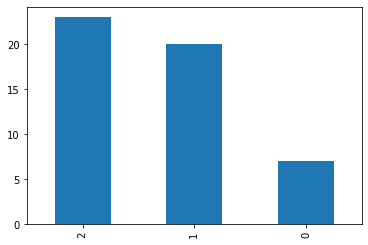

In [26]:
nlp_df['label'].value_counts().plot(kind='bar')

In [27]:
print('스포츠 뉴스, 경제 뉴스, 정치 뉴스의 개수')
print(nlp_df.groupby('label').size().reset_index(name='count'))

스포츠 뉴스, 경제 뉴스, 정치 뉴스의 개수
   label  count
0      0      7
1      1     20
2      2     23


In [28]:
print(f'스포츠 뉴스의 비율 = {round(nlp_df["label"].value_counts()[0]/len(nlp_df) * 100,3)}%')
print(f'경제 뉴스의 비율 = {round(nlp_df["label"].value_counts()[1]/len(nlp_df) * 100,3)}%')
print(f'정치 뉴스의 비율 = {round(nlp_df["label"].value_counts()[2]/len(nlp_df) * 100,3)}%')

스포츠 뉴스의 비율 = 14.0%
경제 뉴스의 비율 = 40.0%
정치 뉴스의 비율 = 46.0%


In [29]:
X_data = nlp_df['text']
y_data = nlp_df['label']
print('뉴스의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

뉴스의 개수: 50
레이블의 개수: 50


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [31]:
print('--------훈련 데이터의 비율-----------')
print(f'스포츠 뉴스 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'경제 뉴스 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print(f'정치 뉴스 = {round(y_train.value_counts()[2]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
스포츠 뉴스 = 15.0%
경제 뉴스 = 40.0%
정치 뉴스 = 45.0%


In [32]:
print('--------테스트 데이터의 비율-----------')
print(f'스포츠 뉴스 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'경제 뉴스 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')
print(f'정치 뉴스 = {round(y_test.value_counts()[2]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
스포츠 뉴스 = 10.0%
경제 뉴스 = 40.0%
정치 뉴스 = 50.0%


In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[764, 3709, 153, 3710, 3711, 3712, 153, 3713, 3714, 25, 21, 1989, 1990, 55, 192, 1319, 1991, 1992, 765, 3715, 3716, 121, 3717, 3718, 765, 462, 463, 17, 636, 3719, 1993, 3720, 3721, 3722, 117, 11, 3723, 1994, 31, 3724, 62, 955, 1995, 1320, 1321, 3725, 3726, 1322, 78, 3727, 956, 3728, 1996, 3729, 957, 3730, 3731, 1997, 3732, 92, 1323, 958, 2, 959, 960, 764, 3733, 401, 1998, 85, 961, 3734, 3735, 766, 3736, 3737, 193, 1324, 1999, 767, 768, 464, 263, 402, 1325, 962, 59, 97, 41, 2000, 4, 2001, 3738, 14, 10, 12, 465, 963, 32, 1326, 37, 534, 3739, 769, 208, 209, 3740, 97, 403, 74, 466, 1327, 3741, 2002, 404, 3742, 964, 263, 402, 3743, 3744, 1328, 3745, 342, 3746, 5, 535, 965, 4, 34, 53, 210, 6, 2003, 97, 3747, 2004, 3, 3748, 233, 637, 767, 768, 3749, 3750, 2005, 966, 302, 2006, 967, 3751, 536, 6, 3752, 2007, 11, 146, 638, 3753, 3754, 343, 2008, 1329, 3755, 467, 57, 3756, 2000, 1330, 129, 770, 771, 3757, 3758, 62, 97, 3759, 5, 3760, 639, 2009, 2, 3761, 468, 130, 62, 97, 968, 3762, 1331, 57, 37

In [34]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'수': 1, '좀': 2, '그': 3, '있는': 4, '이런': 5, '지금': 6, '있습니다': 7, '이렇게': 8, '또': 9, '그런': 10, '하고': 11, '게': 12, '더': 13, '이제': 14, '것': 15, '그리고': 16, '아': 17, '우리': 18, '같은': 19, '이': 20, '오늘': 21, '어': 22, '이재명': 23, '많이': 24, '네': 25, '어떻게': 26, '안': 27, '그래서': 28, '대한': 29, '할': 30, '다': 31, '가장': 32, '제가': 33, '거': 34, '어떤': 35, '그렇게': 36, '되는': 37, '전': 38, '하는': 39, '될': 40, '후보': 41, '보면': 42, '후보가': 43, '해': 44, '저는': 45, '말씀': 46, '다시': 47, '합니다': 48, '왜': 49, '근데': 50, '미국': 51, '때': 52, '같습니다': 53, '굉장히': 54, '바로': 55, '뭐': 56, '내': 57, '고': 58, '한': 59, '가지고': 60, '그런데': 61, '저': 62, '건': 63, '해서': 64, '보고': 65, '계속': 66, '조금': 67, '그럼': 68, '경기': 69, '3': 70, '있다': 71, '있고': 72, '우리가': 73, '현재': 74, '나오고': 75, '큰': 76, '윤석열': 77, '한번': 78, '일단': 79, '이게': 80, '대해서': 81, '되고': 82, '시장': 83, '5': 84, '앞으로': 85, '잘': 86, '정치': 87, '어제': 88, '경우에는': 89, '0': 90, '2': 91, '된': 92, '하지만': 93, '있는데': 94, '박지원': 95, '경제': 96, '안철수': 97, '지난': 98, '들어': 99, '했습니다': 100, '거죠': 101, '

In [35]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

In [36]:
# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

In [37]:
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 9596
단어 집합(vocabulary)에서 희귀 단어의 비율: 72.12868310282622
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 31.860287526146287


In [38]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 13305


뉴스 텍스트의 최대 길이 : 1429
뉴스 텍스트의 평균 길이 : 752.975000


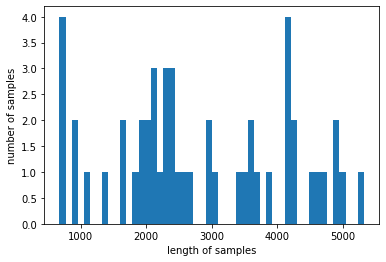

In [39]:
print('뉴스 텍스트의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('뉴스 텍스트의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [40]:
max_len = 1429
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (40, 1429)


## 4. RNN으로 뉴스 카테고리 분류하기

In [41]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=6, batch_size=64, validation_split=0.2)

Epoch 1/6
1/1 [==============================] - 5s 5s/step - loss: 0.7672 - acc: 0.2188 - val_loss: 0.6528 - val_acc: 0.2500
Epoch 2/6
1/1 [==============================] - 1s 1s/step - loss: 0.0650 - acc: 0.5312 - val_loss: 0.7776 - val_acc: 0.2500
Epoch 3/6
1/1 [==============================] - 1s 963ms/step - loss: -0.1658 - acc: 0.5312 - val_loss: 0.5939 - val_acc: 0.2500
Epoch 4/6
1/1 [==============================] - 1s 1s/step - loss: -0.5599 - acc: 0.5312 - val_loss: 0.5602 - val_acc: 0.2500
Epoch 5/6
1/1 [==============================] - 1s 1s/step - loss: -0.7343 - acc: 0.5312 - val_loss: 0.4566 - val_acc: 0.2500
Epoch 6/6
1/1 [==============================] - 1s 1s/step - loss: -0.7696 - acc: 0.5312 - val_loss: 0.5062 - val_acc: 0.2500


In [42]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

1/1 [==============================] - 0s 221ms/step - loss: 0.1092 - acc: 0.4000

 테스트 정확도: 0.4000


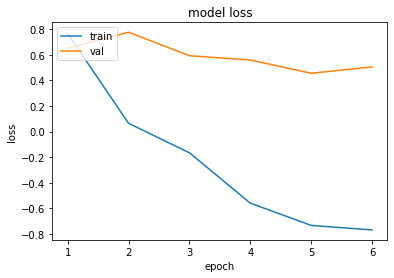

In [43]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [45]:
# confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


plot = plot_confusion_matrix(model, # 분류 모델
                             X_test_padded, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             #display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Blue, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored